In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.utils import shuffle

In [3]:
from keras.models import Model
from keras.layers import Input, Embedding, Dot, Add, Flatten
from keras.regularizers import l2
from keras.optimizers import SGD, Adam

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [4]:
df_train = pd.read_csv('ml-100k/ua.base',"\t", header=None, names=["userId","movieId","rating","timestamp"])
df_test = pd.read_csv('ml-100k/ua.test',"\t", header=None, names=["userId","movieId","rating","timestamp"])

In [5]:
print(df_train.head())

   userId  movieId  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        3       4  878542960
3       1        4       3  876893119
4       1        5       3  889751712


In [6]:
df_train.userId = df_train.userId - 1
df_train.movieId = df_train.movieId - 1
df_train = df_train.drop("timestamp", axis=1)

df_test.userId = df_test.userId - 1
df_test.movieId = df_test.movieId - 1
df_test = df_test.drop("timestamp", axis=1)

df_train = shuffle(df_train)
df_test = shuffle(df_test)

In [7]:
# Intialize variables
K = 10
mu = df_train.rating.mean()
epochs = 500
reg = 0.
N = 943
M = 1682
print N
print M

943
1682


In [8]:
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N, K, embeddings_regularizer=l2(reg))(u) # (N, 1, K)
m_embedding = Embedding(M, K, embeddings_regularizer=l2(reg))(m) # (N, 1, K)

In [9]:
u_bias = Embedding(N, 1, embeddings_regularizer=l2(reg))(u) # (N, 1, 1)
m_bias = Embedding(M, 1, embeddings_regularizer=l2(reg))(m) # (N, 1, 1)
x = Dot(axes=2)([u_embedding, m_embedding]) # (N, 1, 1)

In [10]:
x = Add()([x, u_bias, m_bias])
x = Flatten()(x)

In [11]:
model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
    optimizer='adam',
  # optimizer=Adam(lr=0.01),
  #optimizer=SGD(lr=0.08, momentum=0.9),
  metrics=['mse'],
)

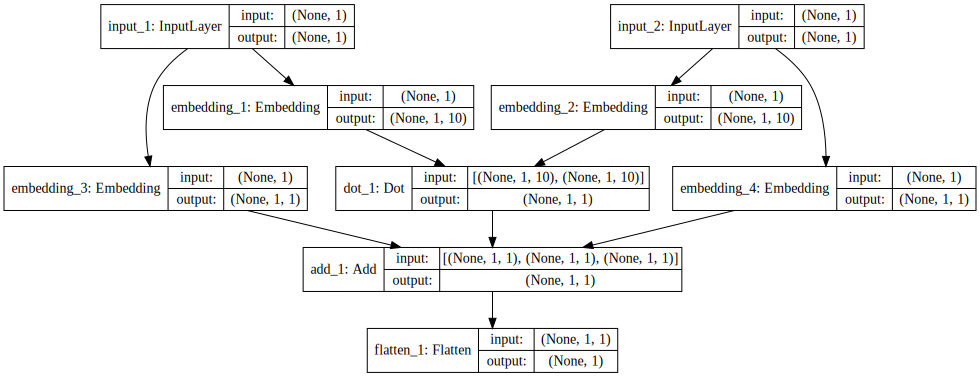

In [12]:
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [13]:
r = model.fit(
  x=[df_train.userId.values, df_train.movieId],
  y=df_train.rating.values - mu,
  epochs=epochs,
  batch_size=128,
  validation_data=(
    [df_test.userId.values, df_test.movieId],
    df_test.rating.values - mu
  )
)

Train on 90570 samples, validate on 9430 samples
Epoch 1/500
90570/90570 [==============================] - 3s 32us/step - loss: 1.1824 - mean_squared_error: 1.1824 - val_loss: 1.1256 - val_mean_squared_error: 1.1256
Epoch 2/500
90570/90570 [==============================] - 2s 27us/step - loss: 1.0102 - mean_squared_error: 1.0102 - val_loss: 1.0113 - val_mean_squared_error: 1.0113
Epoch 3/500
90570/90570 [==============================] - 3s 28us/step - loss: 0.8776 - mean_squared_error: 0.8776 - val_loss: 0.9503 - val_mean_squared_error: 0.9503
Epoch 4/500
90570/90570 [==============================] - 2s 27us/step - loss: 0.8084 - mean_squared_error: 0.8084 - val_loss: 0.9175 - val_mean_squared_error: 0.9175
Epoch 5/500
90570/90570 [==============================] - 3s 36us/step - loss: 0.7644 - mean_squared_error: 0.7644 - val_loss: 0.8985 - val_mean_squared_error: 0.8985
Epoch 6/500
90570/90570 [==============================] - 3s 29us/step - loss: 0.7318 - mean_squared_error: 0.

90570/90570 [==============================] - 3s 28us/step - loss: 0.4864 - mean_squared_error: 0.4864 - val_loss: 1.1533 - val_mean_squared_error: 1.1533
Epoch 50/500
90570/90570 [==============================] - 3s 28us/step - loss: 0.4855 - mean_squared_error: 0.4855 - val_loss: 1.1591 - val_mean_squared_error: 1.1591
Epoch 51/500
90570/90570 [==============================] - 2s 27us/step - loss: 0.4846 - mean_squared_error: 0.4846 - val_loss: 1.1655 - val_mean_squared_error: 1.1655
Epoch 52/500
90570/90570 [==============================] - 3s 28us/step - loss: 0.4836 - mean_squared_error: 0.4836 - val_loss: 1.1728 - val_mean_squared_error: 1.1728
Epoch 53/500
90570/90570 [==============================] - 3s 29us/step - loss: 0.4828 - mean_squared_error: 0.4828 - val_loss: 1.1794 - val_mean_squared_error: 1.1794
Epoch 54/500
90570/90570 [==============================] - 3s 29us/step - loss: 0.4819 - mean_squared_error: 0.4819 - val_loss: 1.1862 - val_mean_squared_error: 1.1862

90570/90570 [==============================] - 3s 33us/step - loss: 0.4609 - mean_squared_error: 0.4609 - val_loss: 1.4380 - val_mean_squared_error: 1.4380
Epoch 98/500
90570/90570 [==============================] - 3s 32us/step - loss: 0.4606 - mean_squared_error: 0.4606 - val_loss: 1.4437 - val_mean_squared_error: 1.4437
Epoch 99/500
90570/90570 [==============================] - 4s 47us/step - loss: 0.4604 - mean_squared_error: 0.4604 - val_loss: 1.4497 - val_mean_squared_error: 1.4497
Epoch 100/500
90570/90570 [==============================] - 3s 33us/step - loss: 0.4601 - mean_squared_error: 0.4601 - val_loss: 1.4555 - val_mean_squared_error: 1.4555
Epoch 101/500
90570/90570 [==============================] - 3s 29us/step - loss: 0.4597 - mean_squared_error: 0.4597 - val_loss: 1.4619 - val_mean_squared_error: 1.4619
Epoch 102/500
90570/90570 [==============================] - 2s 25us/step - loss: 0.4595 - mean_squared_error: 0.4595 - val_loss: 1.4667 - val_mean_squared_error: 1.4

90570/90570 [==============================] - 3s 32us/step - loss: 0.4516 - mean_squared_error: 0.4516 - val_loss: 1.7030 - val_mean_squared_error: 1.7030
Epoch 146/500
90570/90570 [==============================] - 3s 30us/step - loss: 0.4515 - mean_squared_error: 0.4515 - val_loss: 1.7081 - val_mean_squared_error: 1.7081
Epoch 147/500
90570/90570 [==============================] - 3s 37us/step - loss: 0.4514 - mean_squared_error: 0.4514 - val_loss: 1.7129 - val_mean_squared_error: 1.7129
Epoch 148/500
90570/90570 [==============================] - 3s 30us/step - loss: 0.4512 - mean_squared_error: 0.4512 - val_loss: 1.7190 - val_mean_squared_error: 1.7190
Epoch 149/500
90570/90570 [==============================] - 3s 31us/step - loss: 0.4512 - mean_squared_error: 0.4512 - val_loss: 1.7238 - val_mean_squared_error: 1.7238
Epoch 150/500
90570/90570 [==============================] - 3s 28us/step - loss: 0.4510 - mean_squared_error: 0.4510 - val_loss: 1.7293 - val_mean_squared_error: 1

90570/90570 [==============================] - 2s 18us/step - loss: 0.4468 - mean_squared_error: 0.4468 - val_loss: 1.9446 - val_mean_squared_error: 1.9446
Epoch 194/500
90570/90570 [==============================] - 2s 18us/step - loss: 0.4467 - mean_squared_error: 0.4467 - val_loss: 1.9504 - val_mean_squared_error: 1.9504
Epoch 195/500
90570/90570 [==============================] - 2s 18us/step - loss: 0.4466 - mean_squared_error: 0.4466 - val_loss: 1.9551 - val_mean_squared_error: 1.9551
Epoch 196/500
90570/90570 [==============================] - 2s 17us/step - loss: 0.4465 - mean_squared_error: 0.4465 - val_loss: 1.9609 - val_mean_squared_error: 1.9609
Epoch 197/500
90570/90570 [==============================] - 2s 17us/step - loss: 0.4464 - mean_squared_error: 0.4464 - val_loss: 1.9648 - val_mean_squared_error: 1.9648
Epoch 198/500
90570/90570 [==============================] - 2s 18us/step - loss: 0.4464 - mean_squared_error: 0.4464 - val_loss: 1.9698 - val_mean_squared_error: 1

90570/90570 [==============================] - 1s 12us/step - loss: 0.4436 - mean_squared_error: 0.4436 - val_loss: 2.1628 - val_mean_squared_error: 2.1628
Epoch 242/500
90570/90570 [==============================] - 1s 13us/step - loss: 0.4436 - mean_squared_error: 0.4436 - val_loss: 2.1648 - val_mean_squared_error: 2.1648
Epoch 243/500
90570/90570 [==============================] - 1s 12us/step - loss: 0.4435 - mean_squared_error: 0.4435 - val_loss: 2.1724 - val_mean_squared_error: 2.1724
Epoch 244/500
90570/90570 [==============================] - 1s 16us/step - loss: 0.4435 - mean_squared_error: 0.4435 - val_loss: 2.1735 - val_mean_squared_error: 2.1735
Epoch 245/500
90570/90570 [==============================] - 1s 15us/step - loss: 0.4434 - mean_squared_error: 0.4434 - val_loss: 2.1792 - val_mean_squared_error: 2.1792
Epoch 246/500
90570/90570 [==============================] - 1s 14us/step - loss: 0.4433 - mean_squared_error: 0.4433 - val_loss: 2.1839 - val_mean_squared_error: 2

90570/90570 [==============================] - 1s 12us/step - loss: 0.4414 - mean_squared_error: 0.4414 - val_loss: 2.3587 - val_mean_squared_error: 2.3587
Epoch 290/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4414 - mean_squared_error: 0.4414 - val_loss: 2.3617 - val_mean_squared_error: 2.3617
Epoch 291/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4414 - mean_squared_error: 0.4414 - val_loss: 2.3637 - val_mean_squared_error: 2.3637
Epoch 292/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4413 - mean_squared_error: 0.4413 - val_loss: 2.3708 - val_mean_squared_error: 2.3708
Epoch 293/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4413 - mean_squared_error: 0.4413 - val_loss: 2.3715 - val_mean_squared_error: 2.3715
Epoch 294/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4412 - mean_squared_error: 0.4412 - val_loss: 2.3768 - val_mean_squared_error: 2

90570/90570 [==============================] - 1s 11us/step - loss: 0.4398 - mean_squared_error: 0.4398 - val_loss: 2.5317 - val_mean_squared_error: 2.5317
Epoch 338/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4398 - mean_squared_error: 0.4398 - val_loss: 2.5359 - val_mean_squared_error: 2.5359
Epoch 339/500
90570/90570 [==============================] - 1s 13us/step - loss: 0.4398 - mean_squared_error: 0.4398 - val_loss: 2.5370 - val_mean_squared_error: 2.5370
Epoch 340/500
90570/90570 [==============================] - 1s 13us/step - loss: 0.4397 - mean_squared_error: 0.4397 - val_loss: 2.5438 - val_mean_squared_error: 2.5438
Epoch 341/500
90570/90570 [==============================] - 1s 12us/step - loss: 0.4397 - mean_squared_error: 0.4397 - val_loss: 2.5456 - val_mean_squared_error: 2.5456
Epoch 342/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4397 - mean_squared_error: 0.4397 - val_loss: 2.5491 - val_mean_squared_error: 2

90570/90570 [==============================] - 1s 10us/step - loss: 0.4386 - mean_squared_error: 0.4386 - val_loss: 2.6862 - val_mean_squared_error: 2.6862
Epoch 386/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4385 - mean_squared_error: 0.4385 - val_loss: 2.6915 - val_mean_squared_error: 2.6915
Epoch 387/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4385 - mean_squared_error: 0.4385 - val_loss: 2.6958 - val_mean_squared_error: 2.6958
Epoch 388/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4385 - mean_squared_error: 0.4385 - val_loss: 2.6983 - val_mean_squared_error: 2.6983
Epoch 389/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4385 - mean_squared_error: 0.4385 - val_loss: 2.7008 - val_mean_squared_error: 2.7008
Epoch 390/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4385 - mean_squared_error: 0.4385 - val_loss: 2.7035 - val_mean_squared_error: 2

90570/90570 [==============================] - 1s 11us/step - loss: 0.4376 - mean_squared_error: 0.4376 - val_loss: 2.8361 - val_mean_squared_error: 2.8361
Epoch 434/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4375 - mean_squared_error: 0.4375 - val_loss: 2.8391 - val_mean_squared_error: 2.8391
Epoch 435/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4376 - mean_squared_error: 0.4376 - val_loss: 2.8418 - val_mean_squared_error: 2.8418
Epoch 436/500
90570/90570 [==============================] - 1s 11us/step - loss: 0.4375 - mean_squared_error: 0.4375 - val_loss: 2.8452 - val_mean_squared_error: 2.8452
Epoch 437/500
90570/90570 [==============================] - 1s 10us/step - loss: 0.4375 - mean_squared_error: 0.4375 - val_loss: 2.8481 - val_mean_squared_error: 2.8481
Epoch 438/500
90570/90570 [==============================] - 1s 14us/step - loss: 0.4375 - mean_squared_error: 0.4375 - val_loss: 2.8517 - val_mean_squared_error: 2

90570/90570 [==============================] - 1s 15us/step - loss: 0.4367 - mean_squared_error: 0.4367 - val_loss: 2.9744 - val_mean_squared_error: 2.9744
Epoch 482/500
90570/90570 [==============================] - 1s 14us/step - loss: 0.4368 - mean_squared_error: 0.4368 - val_loss: 2.9801 - val_mean_squared_error: 2.9801
Epoch 483/500
90570/90570 [==============================] - 1s 15us/step - loss: 0.4367 - mean_squared_error: 0.4367 - val_loss: 2.9805 - val_mean_squared_error: 2.9805
Epoch 484/500
90570/90570 [==============================] - 1s 15us/step - loss: 0.4368 - mean_squared_error: 0.4368 - val_loss: 2.9826 - val_mean_squared_error: 2.9826
Epoch 485/500
90570/90570 [==============================] - 1s 14us/step - loss: 0.4367 - mean_squared_error: 0.4367 - val_loss: 2.9832 - val_mean_squared_error: 2.9832
Epoch 486/500
90570/90570 [==============================] - 1s 15us/step - loss: 0.4367 - mean_squared_error: 0.4367 - val_loss: 2.9895 - val_mean_squared_error: 2

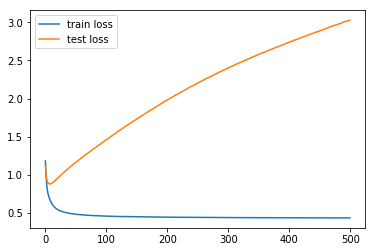

In [15]:
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()